In [1]:
import cv2 # для работы с видео
import math # для математических вычислений

from google.colab.patches import cv2_imshow




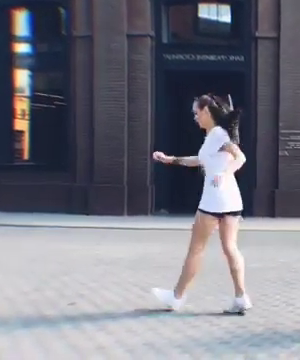

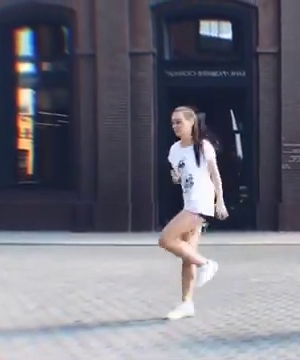

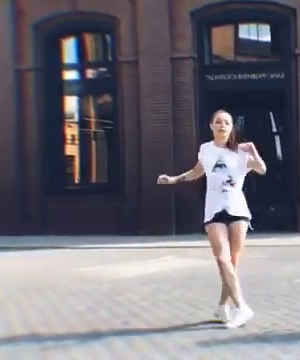

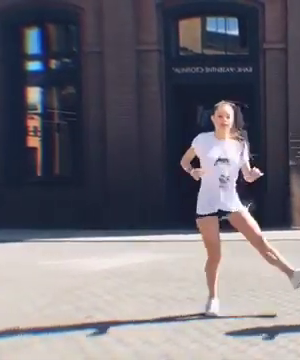

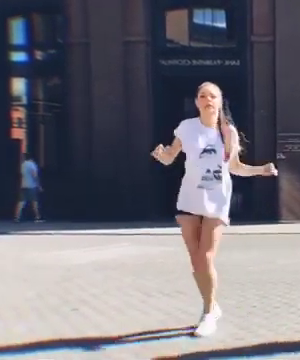

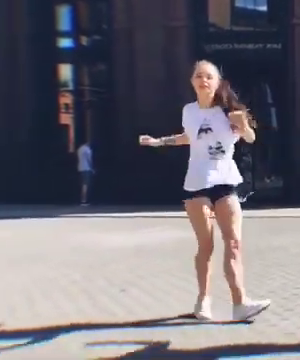

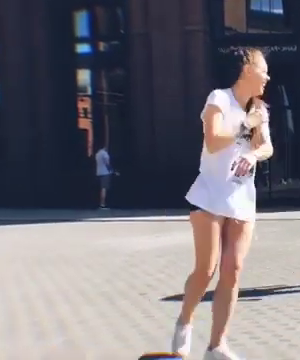

In [2]:
#как кропнуть видео

# Function to merge the resized ROI back into the original frame
def merge_roi(frame, roi, x, y):
    frame[y:y+200, x:x+200, :] = roi
    return frame

# Capture video from the webcam
cap = cv2.VideoCapture('/content/final_video.mp4')
frame_rate = cap.get(5)
while True:
    # Read a frame from the video stream
    ret, frame = cap.read()
    frameId = cap.get(1)

    # If the frame was not read successfully, break the loop
    if not ret:
        break
    elif (frameId % math.floor(frame_rate*5) == 0):
      # Crop a region of interest (ROI) from the frame
      #roi = frame[150:400, 200:450]
      roi = frame[:, 10:310]

      # Resize the ROI to a specific size (e.g., 200x200)
      #roi_resized = cv2.resize(roi, (200, 200))

      # Merge the resized ROI back into the frame
      #frame = merge_roi(frame, roi_resized, 0, 0)

      # Display the merged frame
      #cv2_imshow(frame)
      cv2_imshow(roi)

In [ ]:
!pip install --trusted-host pypi.python.org moviepy
!pip install imageio-ffmpeg

как сократить (trim) видео

In [3]:
from moviepy.video.io.ffmpeg_tools import ffmpeg_extract_subclip


In [4]:
# ffmpeg_extract_subclip("full.mp4", start_seconds, end_seconds, targetname="cut.mp4")
ffmpeg_extract_subclip("/content/final_video.mp4", 6, 13, targetname="cut.mp4")

Moviepy - Running:
>>> "+ " ".join(cmd)
Moviepy - Command successful


In [5]:
video = cv2.VideoCapture('/content/cut.mp4')

width = int(video.get(cv2.CAP_PROP_FRAME_WIDTH))
height = int(video.get(cv2.CAP_PROP_FRAME_HEIGHT))
print(width, height)

640 360


как кропнуть видео с ffmpeg

In [6]:
!ffmpeg -i cut.mp4 -vf "crop=320:360:0:0" -c:a copy out.mp4 #здесь ширина кропа, высота кропа, старт.точка по ширине, старт.точка по длине

ffmpeg version 4.4.2-0ubuntu0.22.04.1 Copyright (c) 2000-2021 the FFmpeg developers
  built with gcc 11 (Ubuntu 11.2.0-19ubuntu1)
  configuration: --prefix=/usr --extra-version=0ubuntu0.22.04.1 --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --arch=amd64 --enable-gpl --disable-stripping --enable-gnutls --enable-ladspa --enable-libaom --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libcodec2 --enable-libdav1d --enable-libflite --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libgme --enable-libgsm --enable-libjack --enable-libmp3lame --enable-libmysofa --enable-libopenjpeg --enable-libopenmpt --enable-libopus --enable-libpulse --enable-librabbitmq --enable-librubberband --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libspeex --enable-libsrt --enable-libssh --enable-libtheora --enable-libtwolame --enable-libvidstab --enable-libvorbis --enable-libvpx --enab

In [7]:
!ffmpeg -i cut.mp4 -vf "crop=320:360:320:0" -c:a copy out.mp4

ffmpeg version 4.4.2-0ubuntu0.22.04.1 Copyright (c) 2000-2021 the FFmpeg developers
  built with gcc 11 (Ubuntu 11.2.0-19ubuntu1)
  configuration: --prefix=/usr --extra-version=0ubuntu0.22.04.1 --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --arch=amd64 --enable-gpl --disable-stripping --enable-gnutls --enable-ladspa --enable-libaom --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libcodec2 --enable-libdav1d --enable-libflite --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libgme --enable-libgsm --enable-libjack --enable-libmp3lame --enable-libmysofa --enable-libopenjpeg --enable-libopenmpt --enable-libopus --enable-libpulse --enable-librabbitmq --enable-librubberband --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libspeex --enable-libsrt --enable-libssh --enable-libtheora --enable-libtwolame --enable-libvidstab --enable-libvorbis --enable-libvpx --enab